# Sunspot Data

https://www.kaggle.com/datasets/abhinand05/daily-sun-spot-data-1818-to-2019?resource=download&select=sunspot_data.csv

https://datatofish.com/import-csv-file-python-using-pandas/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv (r'Data/SN_d_tot_V2.0.csv', delimiter=';')
df.head()

Year  Month  Day  Date in Fraction of Year  Number of Sunspots  \
0  1818      1    1                  1818.001                  -1   
1  1818      1    2                  1818.004                  -1   
2  1818      1    3                  1818.007                  -1   
3  1818      1    4                  1818.010                  -1   
4  1818      1    5                  1818.012                  -1   

   Standard Deviation  Observations  Indicator  
0                -1.0             0          1  
1                -1.0             0          1  
2                -1.0             0          1  
3                -1.0             0          1  
4                -1.0             0          1

In [3]:
ycol = 'Number of Sunspots'
xcol = 'Date in Fraction of Year'

In [4]:
from scipy.signal import savgol_filter

In [5]:
window_length = int((4 * 365) + 1)
poly_order = [1, 2]
smoothed1 = savgol_filter(df[ycol].values, window_length, poly_order[0])
smoothed2 = savgol_filter(df[ycol].values, window_length, poly_order[1])

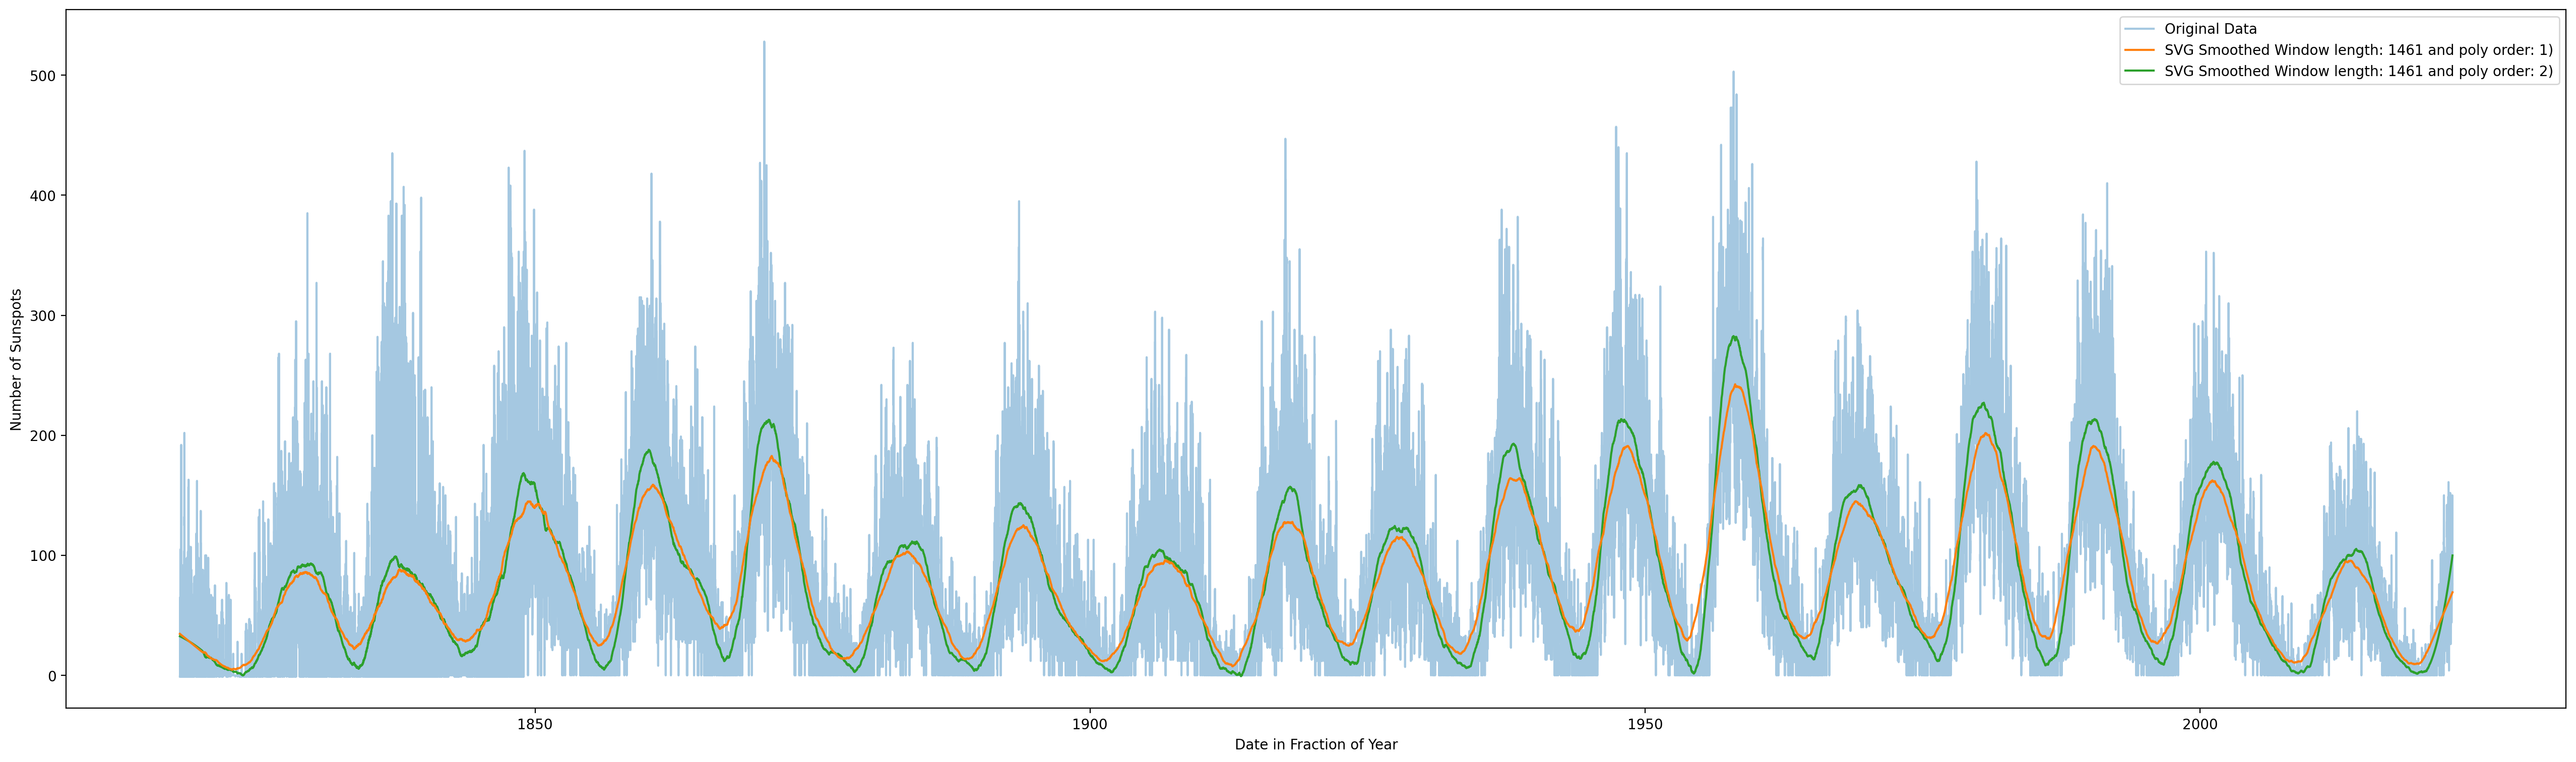

In [6]:
fig, ax = plt.subplots(dpi=200, figsize=[32, 9])
ax.plot(df[xcol], df[ycol], alpha=0.4, label='Original Data')
ax.plot(df[xcol], smoothed1,
        label=f'SVG Smoothed Window length: {window_length} and poly order: {poly_order[0]})', 
       zorder=99)
ax.plot(df[xcol], smoothed2,
        label=f'SVG Smoothed Window length: {window_length} and poly order: {poly_order[1]})')
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)
ax.legend()

[1814.001 1814.004 1814.007 ... 2018.741 2018.744 2018.747]
[10.001 10.004 10.007 ... 16.741 16.744 16.747]


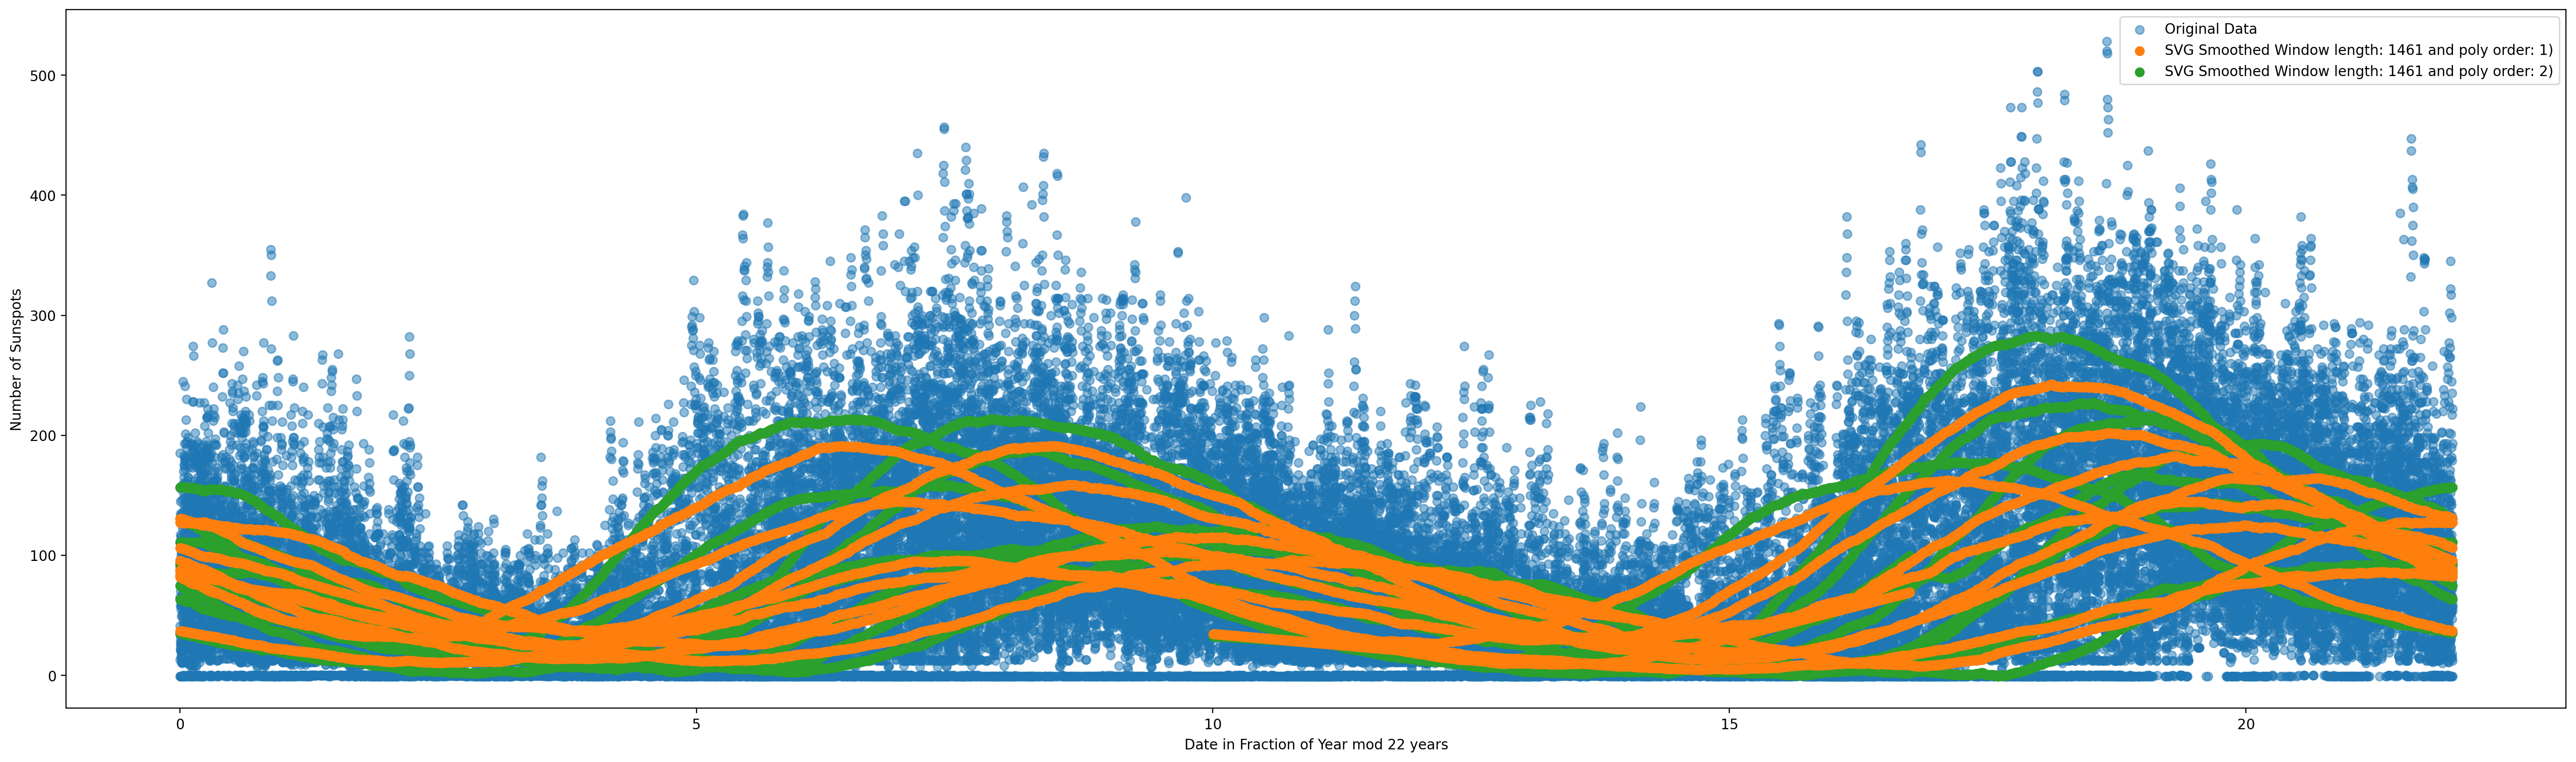

In [7]:
time = df[xcol].values - 4
period = 22
phase = time % (period)

print(time)
print(phase)
fig, ax = plt.subplots(dpi=200, figsize=[32, 9])
ax.scatter(phase, df[ycol], alpha=0.5, label='Original Data')
ax.scatter(phase, smoothed1, 
        label=f'SVG Smoothed Window length: {window_length} and poly order: {poly_order[0]})', 
       zorder=99)
ax.scatter(phase, smoothed2, 
        label=f'SVG Smoothed Window length: {window_length} and poly order: {poly_order[1]})')
ax.set_xlabel(xcol + f' mod {period} years')
ax.set_ylabel(ycol)
ax.legend()

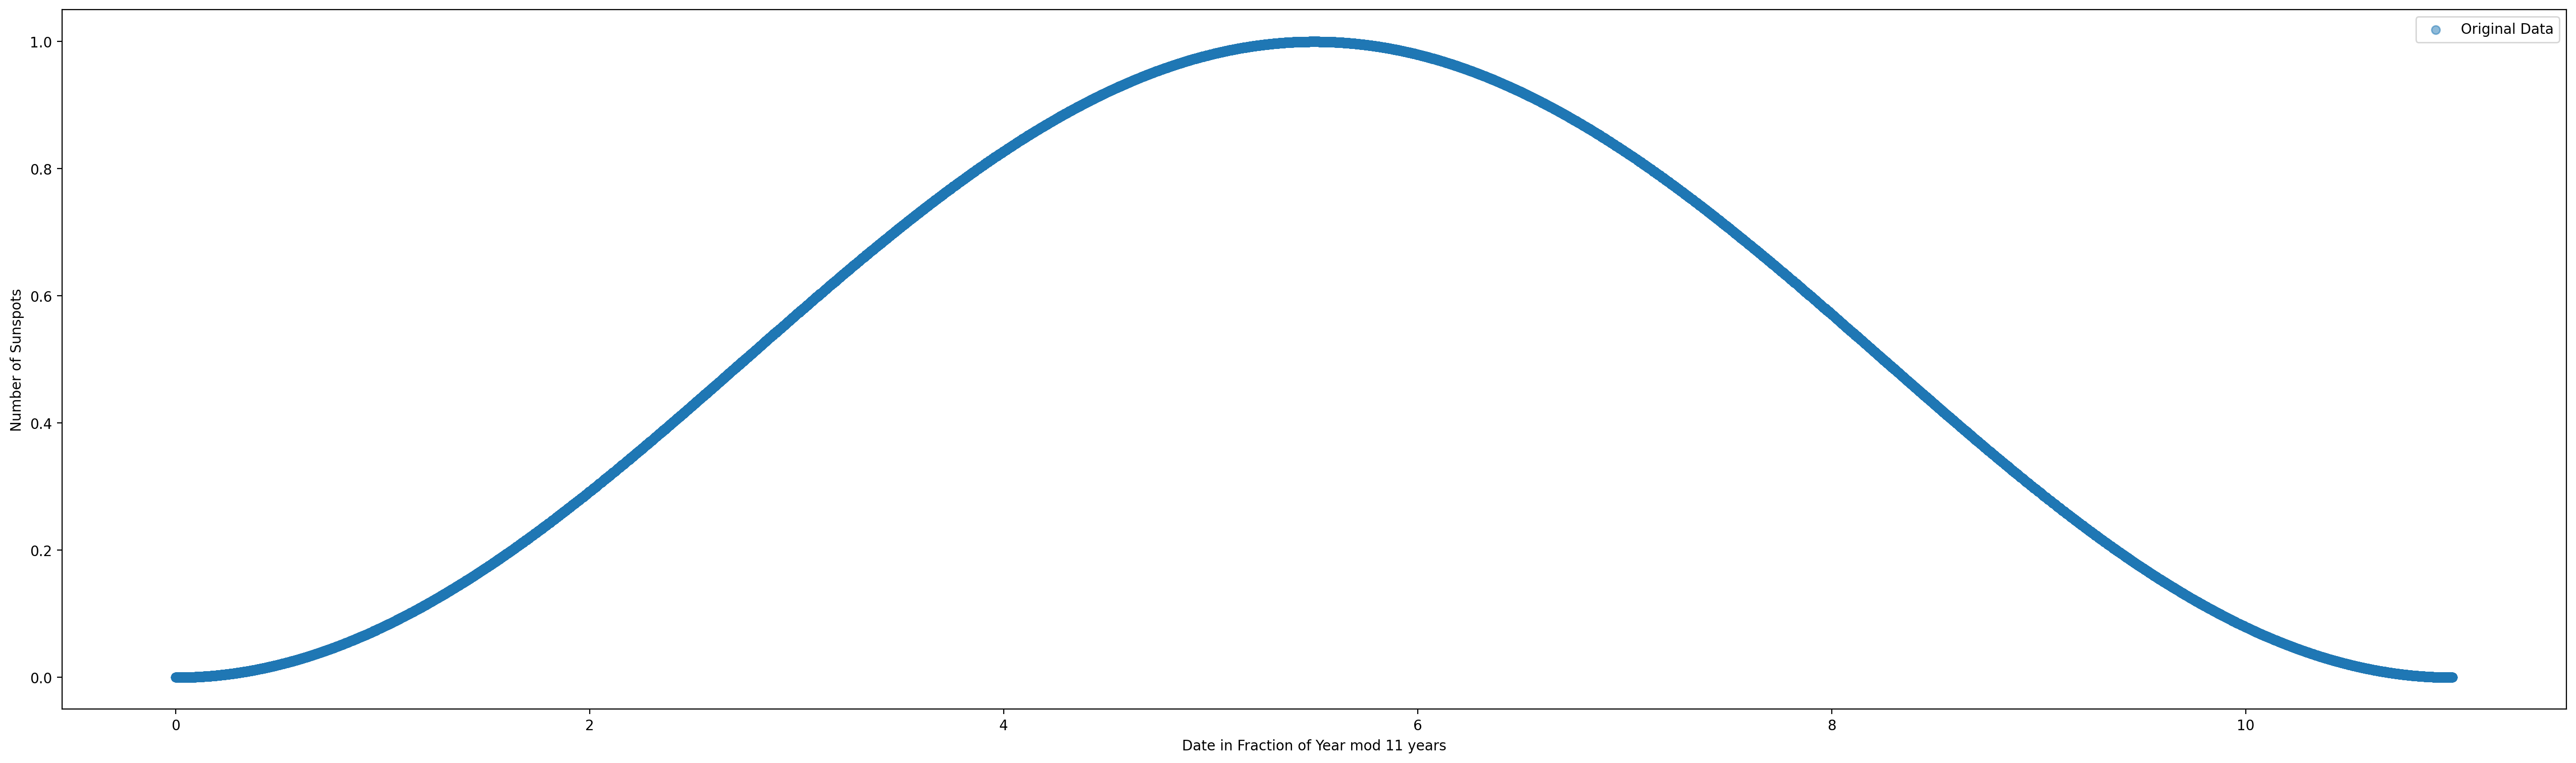

In [8]:
time = df[xcol].values - 4
period = 11
phase = time % (period)
y = np.sin(np.pi / period * time)**2

fig, ax = plt.subplots(dpi=200, figsize=[32, 9])
ax.scatter(phase, y, alpha=0.5, label='Original Data')

ax.set_xlabel(xcol + f' mod {period} years')
ax.set_ylabel(ycol)
ax.legend()